<a href="https://colab.research.google.com/github/ManojKesani/knowledge_distill_image_retrival/blob/main/knowledge_distill_image_retrival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tf-nightly

In [ ]:
!unzip /content/drive/MyDrive/datasets/image_retrieval.zip -d/content/data

In [2]:
!nvidia-smi

Thu Feb 11 06:28:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.efficientnet import decode_predictions,preprocess_input

import glob


In [4]:
model = tf.keras.applications.EfficientNetB7(weights='imagenet' ,include_top=True,classifier_activation=None)


268328960/268326632 [==============================] - 3s 0us/step


In [ ]:
import pandas as pd

col_names = ['image_path','teacher_logits','label']
df = pd.DataFrame(columns=col_names)
# i = 0
for idx,path in enumerate(glob.iglob(r'/content/data/dataset/*.jpg')) :
  print(idx)

  # if idx > 5:
  #   break
  
  img = image.load_img(path,target_size=(600,600))
  x =img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)

  df.loc[idx] = [path,preds[0],decode_predictions(preds, top=1)[0][0][1]]
# print(i)

In [95]:
for idx,row in enumerate(df.iterrows()):

  if row[1]['label'] == 'snow_leopard':
    # df.iloc[idx]['label'] = 'leopard'
    
    print(df.iloc[idx]['label'])

In [94]:
df

image_path  ...        label
0     /content/data/dataset/1610.jpg  ...         lion
1     /content/data/dataset/2954.jpg  ...         lion
2     /content/data/dataset/4201.jpg  ...      red_fox
3     /content/data/dataset/2269.jpg  ...      leopard
4      /content/data/dataset/137.jpg  ...      cheetah
...                              ...  ...          ...
4733  /content/data/dataset/1597.jpg  ...        tiger
4734    /content/data/dataset/86.jpg  ...         lion
4735  /content/data/dataset/3622.jpg  ...  timber_wolf
4736  /content/data/dataset/3214.jpg  ...        tiger
4737  /content/data/dataset/1319.jpg  ...         lion

[4738 rows x 3 columns]

In [96]:
import collections
a = df['label'].tolist()

counter=collections.Counter(a)
print(counter)

Counter({'lion': 1241, 'tiger': 1066, 'leopard': 715, 'cheetah': 610, 'red_fox': 330, 'timber_wolf': 326, 'jaguar': 236, 'Arctic_fox': 52, 'white_wolf': 48, 'coyote': 38, 'grey_fox': 32, 'red_wolf': 21, 'kit_fox': 13, 'dingo': 4, 'Eskimo_dog': 3, 'Norwegian_elkhound': 1, 'malamute': 1, 'tiger_cat': 1})


In [97]:
new_df = pd.DataFrame(columns=col_names)
i = 0
for idx,row in df.iterrows():
  label = row['label']
  
  if counter[label] >100:
    # print(type(row))
    new_df.loc[i] = row
    i += 1

 

In [98]:
# new_df.to_csv('teacher_logits_data.csv')
for idx,row in new_df.iterrows():
  if idx<5:
    print(row)

image_path                           /content/data/dataset/1610.jpg
teacher_logits    [0.36231345, -0.32008755, -0.23313941, -0.0255...
label                                                          lion
Name: 0, dtype: object
image_path                           /content/data/dataset/2954.jpg
teacher_logits    [0.4015569, -0.54240143, -0.1617702, 0.0284352...
label                                                          lion
Name: 1, dtype: object
image_path                           /content/data/dataset/4201.jpg
teacher_logits    [-0.22702439, 0.29274777, 0.18287279, -0.39139...
label                                                       red_fox
Name: 2, dtype: object
image_path                           /content/data/dataset/2269.jpg
teacher_logits    [-0.5040137, -0.5480773, -0.045099795, 0.12189...
label                                                       leopard
Name: 3, dtype: object
image_path                            /content/data/dataset/137.jpg
teacher_logits    [-0.05

In [99]:
import collections
a = new_df['label'].tolist()

counter=collections.Counter(a)

name = []
count = []

for key in counter.keys():
  name.append(key)
  count.append(counter[key])

In [100]:
new_df

image_path  ...        label
0     /content/data/dataset/1610.jpg  ...         lion
1     /content/data/dataset/2954.jpg  ...         lion
2     /content/data/dataset/4201.jpg  ...      red_fox
3     /content/data/dataset/2269.jpg  ...      leopard
4      /content/data/dataset/137.jpg  ...      cheetah
...                              ...  ...          ...
4519  /content/data/dataset/1597.jpg  ...        tiger
4520    /content/data/dataset/86.jpg  ...         lion
4521  /content/data/dataset/3622.jpg  ...  timber_wolf
4522  /content/data/dataset/3214.jpg  ...        tiger
4523  /content/data/dataset/1319.jpg  ...         lion

[4524 rows x 3 columns]

In [101]:
counter

Counter({'cheetah': 610,
         'jaguar': 236,
         'leopard': 715,
         'lion': 1241,
         'red_fox': 330,
         'tiger': 1066,
         'timber_wolf': 326})

<BarContainer object of 7 artists>

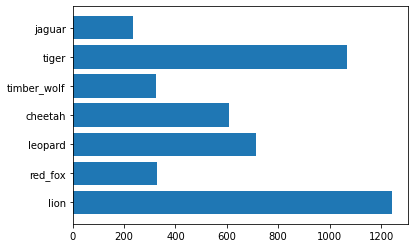

In [102]:
import matplotlib.pyplot as plt

plt.barh(name,count)

In [103]:
name

['lion', 'red_fox', 'leopard', 'cheetah', 'timber_wolf', 'tiger', 'jaguar']

In [104]:
onehot_list = []
for l in new_df['label'].tolist():
  onehot = np.zeros(len(name))
  idx = name.index(l)
  onehot[idx] = 1
  onehot_list.append(onehot)


In [105]:
label_int = []
for l in new_df['label'].tolist():
  idx = name.index(l)
  label_int.append(idx)

In [106]:
new_df['label_onehot'] = onehot_list
new_df['label_int'] = label_int


In [19]:
new_df.to_csv('eff-net-d7_teacher_logits.csv')

In [ ]:
# new_df = pd.read_csv('eff-net-d7_teacher_logits.csv')

In [107]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D ,Flatten ,Reshape,Activation,BatchNormalization,concatenate
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate,add,UpSampling2D

from keras.callbacks import TensorBoard
from keras.models import Model ,load_model
from keras.utils import Sequence
from keras.utils import plot_model
from keras import backend as K
from keras import preprocessing


from IPython.display import Image

from skimage.io import imread
from skimage import io

import random


In [108]:
class DataGenerator(Sequence):
  def __init__(self, path_list,teacher_logits,labels, batch_size, flip = True,flag = False):
    self.path_list = path_list
    self.batch_size = batch_size
    self.flip = flip
    self.logits = list(teacher_logits)
    self.labels = labels
    self.flag = flag

  def __len__(self):
    return int(np.floor(len(self.path_list) / self.batch_size))

  def __getitem__(self,index):
    # print('working on batch ',index)
    paths = self.path_list[index*self.batch_size:(index+1)*self.batch_size]
    logit = self.logits[index*self.batch_size:(index+1)*self.batch_size]
    label = self.labels[index*self.batch_size:(index+1)*self.batch_size]

    x = np.empty((batch_size, 512, 512, 3), dtype=np.float32)
    t = np.empty((batch_size,1000))
    l = np.empty((batch_size,1))
    for idx, data in enumerate(zip(paths,logit,label)):
      t[idx] =  data[1]
      l[idx] = data[2]
      # flip image
      if random.random()<0.5:
        x[idx] = np.fliplr(imread(data[0]).astype('float32')/255.)        
      else:
        x[idx] = imread(data[0]).astype('float32')/255.

    if self.flag == True:
      return x , t , l , paths
    
    return x , t , l 
 


In [109]:
path_list = new_df['image_path'].tolist()
teacher_logits = new_df['teacher_logits'].tolist()
OH_labels = new_df['label_onehot'].tolist()
labels = new_df['label_int'].tolist()


In [110]:
train_path_list=path_list[:4000]
train_teacher_logits=teacher_logits[:4000]
train_OH_labels=OH_labels[:4000]
train_labels=labels[:4000]


validation_path_list=path_list[4000:]
validation_teacher_logits=teacher_logits[4000:]
validation_OH_labels=OH_labels[4000:]
validation_labels=labels[4000:]

In [111]:
a = next(iter(validation_data))

In [112]:
len(a)

4

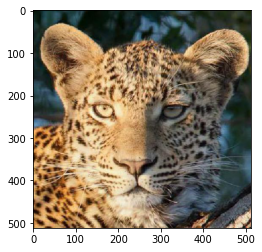

In [113]:
img = a[0][2]
plt.imshow(img)

In [114]:
OUTPUT_CHANNELS = 3
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

def dense(nodes,activation = 'relu'):
  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Dense(nodes,activation=activation)
  )

  return result

def convo1d(filters,activation = 'relu'):
  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv1D(filters,1,activation=activation)
  )

  return result


In [226]:
def unet_like():
  inputs = tf.keras.layers.Input(shape=[512,512,3])

  down_stack = [
    downsample(32, 4, apply_batchnorm=False), # (bs, 256, 256, 64)
    downsample(32, 4), # (bs, 64, 64, 128)?
    downsample(64, 4), # (bs, 32, 32, 256)?
    downsample(64, 4), # (bs, 16, 16, 512)?
    downsample(128, 4), # (bs, 8, 8, 512)?
    downsample(128, 4), # (bs, 4, 4, 512)?
    downsample(256, 4), # (bs, 2, 2, 512)?
    downsample(256, 4), # (bs, 1, 1, 512)?
  ]

  up_stack = [
    upsample(256, 4, apply_dropout=True), # (bs, 2, 2, 1024)?
    upsample(256, 4, apply_dropout=True), # (bs, 4, 4, 1024)?
    upsample(128, 4, apply_dropout=True), # (bs, 8, 8, 1024)?
    upsample(64, 4), # (bs, 16, 16, 1024)?
    upsample(32, 4), # (bs, 32, 32, 512)?
    upsample(16, 4), # (bs, 64, 64, 256)?
    upsample(16, 4), # (bs, 128, 128, 128)?
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='sigmoid') # (bs, 512, 512, 3)
  print('hi')

  x = inputs

  # Downsampling through the model
  skips = []
  for idx,down in enumerate(down_stack):
    x = down(x)
    skips.append(x)

    #attach student
    # if idx == len(down_stack)-2:
    #   s1 = x

  skips = reversed(skips[:-1])

  shape_before_flattening = K.int_shape(x)

  x = Flatten()(x)

  encode = dense(1024)(x)
  x = Reshape(shape_before_flattening[1:])(encode)



  # Upsampling and establishing the skip connections
  for idx,(up, skip) in enumerate(zip(up_stack, skips)):
    
    #attach student
    if idx == 3:
      s1 = x
      # break

    x = up(x)
    if idx<3:
      # x = tf.keras.layers.Concatenate()([x, skip])
      pass

    
    

  x = last(x)

  #student stuff

  # # s2 = tf.keras.layers.Flatten()(s1)
  # # sx1 = dense(1024)(s2)
  # # sx2 = dense(1000,activation=None)(sx1)

  # s2 = tf.keras.layers.Flatten()(s1)
  # sx2 = dense(1000,activation=None)(s2)  #38,706,027 good at 30 epochs

  s2 = downsample(32, 4)(s1)
  s3 = downsample(16, 4)(s2)
  s4 = tf.keras.layers.Flatten()(s3)
  sx2 = dense(1000,activation=None)(s4)     #6,267,947






  return tf.keras.Model(inputs=inputs, outputs=[x,sx2,encode])

In [227]:
model = unet_like()
# tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)
model.summary()

hi
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
sequential_87 (Sequential)      (None, 256, 256, 32) 1536        input_7[0][0]                    
__________________________________________________________________________________________________
sequential_88 (Sequential)      (None, 128, 128, 32) 16512       sequential_87[0][0]              
__________________________________________________________________________________________________
sequential_89 (Sequential)      (None, 64, 64, 64)   33024       sequential_88[0][0]              
_________________________________________________________________________________________

#test

In [ ]:
# def unet_like(input_size=(512,512,3)):
#     inputs = Input(input_size)
    
#     conv1 = Conv2D(32, (3, 3), padding='same',activation='relu')(inputs)
#     conv1 = Conv2D(32, (3, 3), padding='same',activation='relu')(conv1)
#     bn1 = BatchNormalization(axis=3)(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

#     conv2 = Conv2D(64, (3, 3), padding='same',activation='relu')(pool1)
#     conv2 = Conv2D(64, (3, 3), padding='same',activation='relu')(conv2)
#     bn2 = BatchNormalization(axis=3)(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

#     conv3 = Conv2D(128, (3, 3), padding='same',activation='relu')(pool2)
#     conv3 = Conv2D(128, (3, 3), padding='same',activation='relu')(conv3)
#     bn3 = BatchNormalization(axis=3)(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

#     conv4 = Conv2D(256, (3, 3), padding='same',activation='relu')(pool3)
#     conv4 = Conv2D(256, (3, 3), padding='same',activation='relu')(conv4)
#     bn4 = BatchNormalization(axis=3)(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

#     conv5 = Conv2D(256, (3, 3), padding='same',activation='relu')(pool4)
#     conv5 = Conv2D(256, (3, 3), padding='same',activation='relu')(conv5)
#     bn5 = BatchNormalization(axis=3)(conv5)

#     #student
#     s1 = Conv2D(256, (3, 3), padding='same',activation='relu')(bn5)
#     s2 = Conv2D(128, (3, 3), padding='same',activation='relu')(s1)
#     x = Flatten()(s2)

#     d1 = Dense(1000,activation='relu')



#     up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
#     conv6 = Conv2D(512, (3, 3), padding='same',activation='relu')(up6)
#     conv6 = Conv2D(512, (3, 3), padding='same',activation='relu')(conv6)
#     bn6 = BatchNormalization(axis=3)(conv6)

#     up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
#     conv7 = Conv2D(256, (3, 3), padding='same',activation='relu')(up7)
#     conv7 = Conv2D(256, (3, 3), padding='same',activation='relu')(conv7)
#     bn7 = BatchNormalization(axis=3)(conv7)

#     up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
#     conv8 = Conv2D(128, (3, 3), padding='same',activation='relu')(up8)
#     conv8 = Conv2D(128, (3, 3), padding='same',activation='relu')(conv8)
#     bn8 = BatchNormalization(axis=3)(conv8)

#     up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
#     conv9 = Conv2D(64, (3, 3), padding='same',activation='relu')(up9)
#     conv9 = Conv2D(64, (3, 3), padding='same',activation='relu')(conv9)
#     bn9 = BatchNormalization(axis=3)(conv9)

#     conv10 = Conv2D(3, (1, 1), activation='sigmoid')(bn9)

#     return Model(inputs=[inputs], outputs=[conv10,d1])



# model = unet_like()
# model.summary()


In [ ]:
# from tensorflow.keras import layers
# class unet_like(layers.Layer):
#   def __init__(self):
#     super(unet_like,self).__init__()
#     # self.input_shape = input_shape

#   def call(self,inputs):
#     inputs = Input(input = inputs)
    
#     conv1 = Conv2D(32, (3, 3), padding='same',activation='relu')(inputs)
#     conv1 = Conv2D(32, (3, 3), padding='same',activation='relu')(conv1)
#     bn1 = BatchNormalization(axis=3)(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

#     conv2 = Conv2D(64, (3, 3), padding='same',activation='relu')(pool1)
#     conv2 = Conv2D(64, (3, 3), padding='same',activation='relu')(conv2)
#     bn2 = BatchNormalization(axis=3)(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

#     conv3 = Conv2D(128, (3, 3), padding='same',activation='relu')(pool2)
#     conv3 = Conv2D(128, (3, 3), padding='same',activation='relu')(conv3)
#     bn3 = BatchNormalization(axis=3)(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

#     conv4 = Conv2D(256, (3, 3), padding='same',activation='relu')(pool3)
#     conv4 = Conv2D(256, (3, 3), padding='same',activation='relu')(conv4)
#     bn4 = BatchNormalization(axis=3)(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

#     conv5 = Conv2D(256, (3, 3), padding='same',activation='relu')(pool4)
#     conv5 = Conv2D(256, (3, 3), padding='same',activation='relu')(conv5)
#     bn5 = BatchNormalization(axis=3)(conv5)

#     #student
#     s1 = Conv2D(256, (3, 3), padding='same',activation='relu')(bn5)
#     s2 = Conv2D(128, (3, 3), padding='same',activation='relu')(s1)
#     x = Flatten()(s2)

#     d1 = Dense(1000,activation='relu')



#     up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
#     conv6 = Conv2D(512, (3, 3), padding='same',activation='relu')(up6)
#     conv6 = Conv2D(512, (3, 3), padding='same',activation='relu')(conv6)
#     bn6 = BatchNormalization(axis=3)(conv6)

#     up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
#     conv7 = Conv2D(256, (3, 3), padding='same',activation='relu')(up7)
#     conv7 = Conv2D(256, (3, 3), padding='same',activation='relu')(conv7)
#     bn7 = BatchNormalization(axis=3)(conv7)

#     up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
#     conv8 = Conv2D(128, (3, 3), padding='same',activation='relu')(up8)
#     conv8 = Conv2D(128, (3, 3), padding='same',activation='relu')(conv8)
#     bn8 = BatchNormalization(axis=3)(conv8)

#     up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
#     conv9 = Conv2D(64, (3, 3), padding='same',activation='relu')(up9)
#     conv9 = Conv2D(64, (3, 3), padding='same',activation='relu')(conv9)
#     bn9 = BatchNormalization(axis=3)(conv9)

#     conv10 = Conv2D(3, (1, 1), activation='sigmoid')(bn9)

#     return conv10,d1



# model = unet_like()
# # model.summary()


In [ ]:
batch_size = 64
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data
x_train = x_train.astype("float32") / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))

x_test = x_test.astype("float32") / 255.0
x_test = np.reshape(x_test, (-1, 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#Models

In [228]:
import keras
class Distiller(keras.Model):
    def __init__(self, model):
        super(Distiller, self).__init__()
        self.model = model
        # self.student = student

    def call(self,input_tensor,training=False):
      return self.model(input_tensor,training = training)


    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        reconstruction_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.reconstruction_loss_fn = reconstruction_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x,t,y = data

        # Forward pass of teacher
        teacher_predictions = t

        with tf.GradientTape() as tape:
            # Forward pass of student
            reconstruction,student_predictions,_ = self.model(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            s_loss = (self.alpha * student_loss + (1 - self.alpha) * distillation_loss)*10

            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(self.reconstruction_loss_fn(x, reconstruction), axis=(1, 2)))/(512*512*3) #keras.losses.binary_crossentropy

            loss = 0.5*(s_loss + reconstruction_loss)

        # Compute gradients
        trainable_vars = self.model.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)
        # self.compiled_metrics.update_state(x, reconstruction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        # results.update(
        #     {"student_loss": student_loss, "distillation_loss": distillation_loss,'s_loss':s_loss, 'rec_loss': reconstruction_loss, 'total_loss': loss}
        # )
        results.update(
            {'s_loss':s_loss, 'rec_loss': reconstruction_loss, 'total_loss': loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x,t, y = data

        # Compute predictions
        reconstruction,y_prediction,_ = self.model(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss1": student_loss})
        return results


In [229]:
batch_size = 32
train_data = DataGenerator(train_path_list,train_teacher_logits,train_labels, batch_size,flag = False)
validation_data = DataGenerator(validation_path_list,validation_teacher_logits,validation_labels, batch_size,flag = False)

In [230]:
!rm -r /content/output

# Initialize and compile distiller
distiller = Distiller(model = model)
distiller.compile(
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(),'mae'],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    distillation_loss_fn=keras.losses.KLDivergence(),
    reconstruction_loss_fn = keras.losses.binary_crossentropy,
    
    alpha=0.5,
    temperature=10,
)

# Distill teacher to student
distiller.fit(train_data,epochs=30,validation_data=validation_data,callbacks=[TensorBoard(log_dir='/content/output')])
# distiller.fit(train_data,epochs=2)

# Evaluate student on test dataset
# distiller.evaluate(x_test, y_test)


Epoch 1/30
125/125 [==============================] - 43s 325ms/step - sparse_categorical_accuracy: 0.4036 - mae: 4.7262 - s_loss: 7.5143 - rec_loss: 0.2276 - total_loss: 3.8710 - val_sparse_categorical_accuracy: 0.3164 - val_mae: 4.9662 - val_student_loss1: 2.6654
Epoch 2/30
125/125 [==============================] - 40s 319ms/step - sparse_categorical_accuracy: 0.8624 - mae: 6.5147 - s_loss: 2.0645 - rec_loss: 0.2273 - total_loss: 1.1459 - val_sparse_categorical_accuracy: 0.4922 - val_mae: 6.7241 - val_student_loss1: 2.5864
Epoch 3/30
125/125 [==============================] - 40s 319ms/step - sparse_categorical_accuracy: 0.8924 - mae: 6.8967 - s_loss: 1.3840 - rec_loss: 0.2272 - total_loss: 0.8056 - val_sparse_categorical_accuracy: 0.7930 - val_mae: 7.8390 - val_student_loss1: 0.4112
Epoch 4/30
125/125 [==============================] - 40s 316ms/step - sparse_categorical_accuracy: 0.9147 - mae: 6.9424 - s_loss: 1.2037 - rec_loss: 0.2272 - total_loss: 0.7154 - val_sparse_categorical

In [ ]:

%load_ext tensorboard
%tensorboard --logdir /content/output

In [232]:
a,_,_ = next(iter(validation_data))
out = distiller.predict(a)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


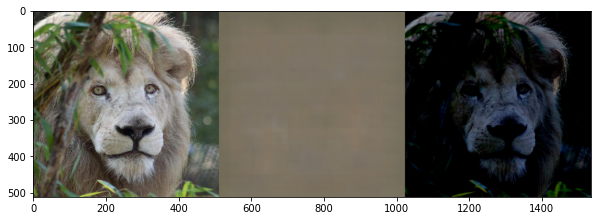

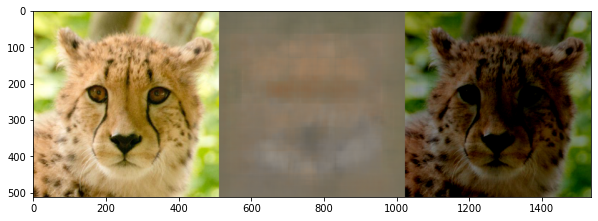

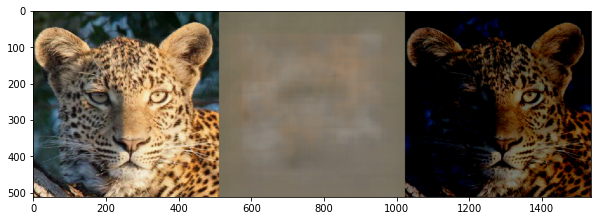

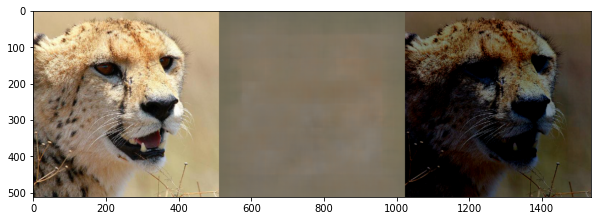

In [233]:
for i in range(out[0].shape[0]):
  if i>3:
    break
  plt.figure(figsize=(10,10))
  image = np.hstack((a[i],out[0][i],a[i]-out[0][i]))
  plt.imshow(image)


In [234]:
batch_size = 32
train_data = DataGenerator(train_path_list,train_teacher_logits,train_labels, batch_size,flag = True)
validation_data = DataGenerator(validation_path_list,validation_teacher_logits,validation_labels, batch_size,flag = True)

In [235]:
output_df = pd.DataFrame(columns=['image_path','encoding','label','train/test'])

for data in train_data:

  images,_,labels,paths = data
  _,_,encodings = distiller.predict(images)

  for idx,encode in enumerate(encodings):
    output_df = output_df.append({'image_path':paths[idx],
                                  'encoding':encode,
                                  'label':labels[idx],
                                  'train/test':'train'},ignore_index=True)

  # print(encode.shape)


In [236]:
# validation_data
for data in validation_data:

  images,_,labels,paths = data
  _,_,encodings = distiller.predict(images)

  for idx,encode in enumerate(encodings):
    # print(encode.shape)
    output_df = output_df.append({'image_path':paths[idx],
                                  'encoding':encode,
                                  'label':labels[idx],
                                  'train/test':'test'},ignore_index=True)


In [237]:
data_t = np.zeros((4000,1024))
l_t = np.zeros((4000,1))

data_v = np.zeros((512,1024))
l_v = np.zeros((512,1))

In [238]:
train_encoded_data = output_df[output_df['train/test']=='train']['encoding']
train_lb = output_df[output_df['train/test']=='train']['label']


val_encoded_data = output_df[output_df['train/test']=='test']['encoding']
val_lb = output_df[output_df['train/test']=='test']['label']

In [239]:
len(val_lb)

512

In [240]:
for idx, row in enumerate(train_encoded_data.iteritems()):
  data_t[idx] = np.array(row[1])

for idx, row in enumerate(train_lb.iteritems()):
  l_t[idx] = np.array(row[1])

for idx, row in enumerate(val_encoded_data.iteritems()):
  data_v[idx] = np.array(row[1])

for idx, row in enumerate(val_lb.iteritems()):
  l_v[idx] = np.array(row[1])

In [241]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, init='random', random_state=0)
proj_t = tsne.fit_transform(data_t)

tsne = TSNE(n_components=3, init='random', random_state=0)
proj_v = tsne.fit_transform(data_v)



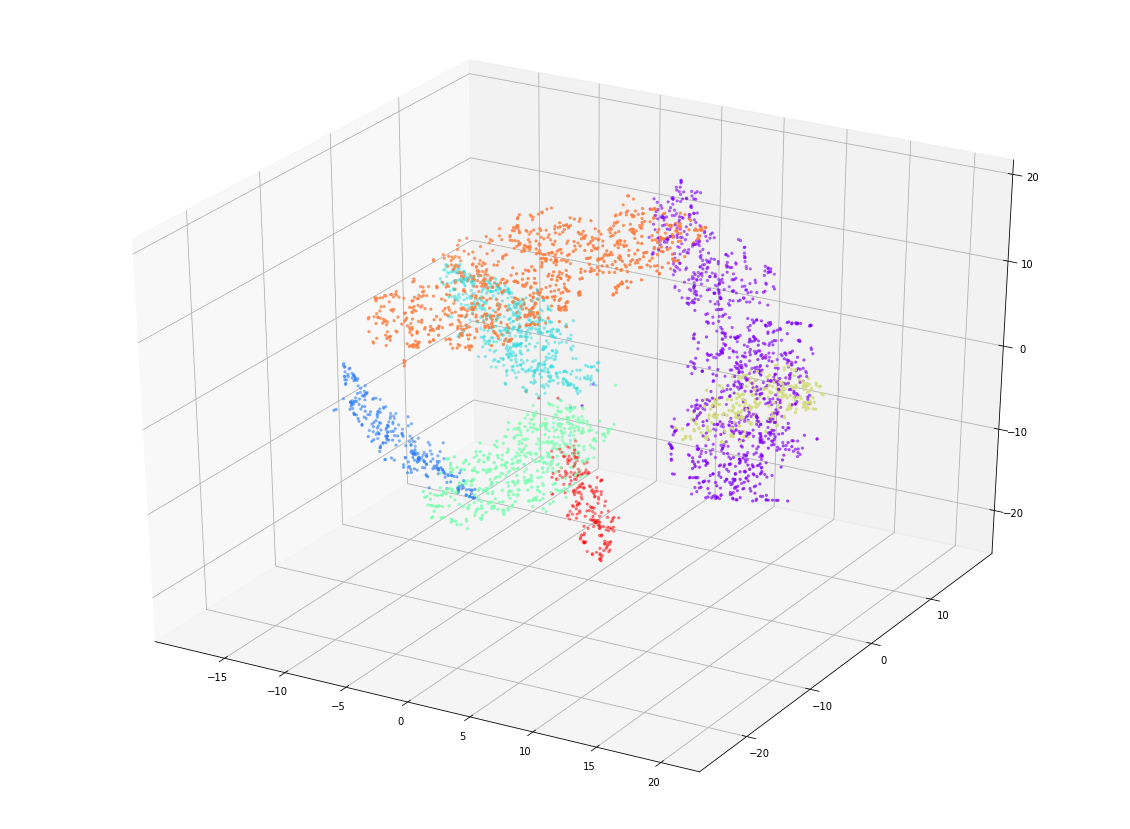

In [242]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')
ax.scatter3D(proj_t[:, 0], proj_t[:, 1],proj_t[:, 2], c=l_t, s=5, cmap='rainbow')

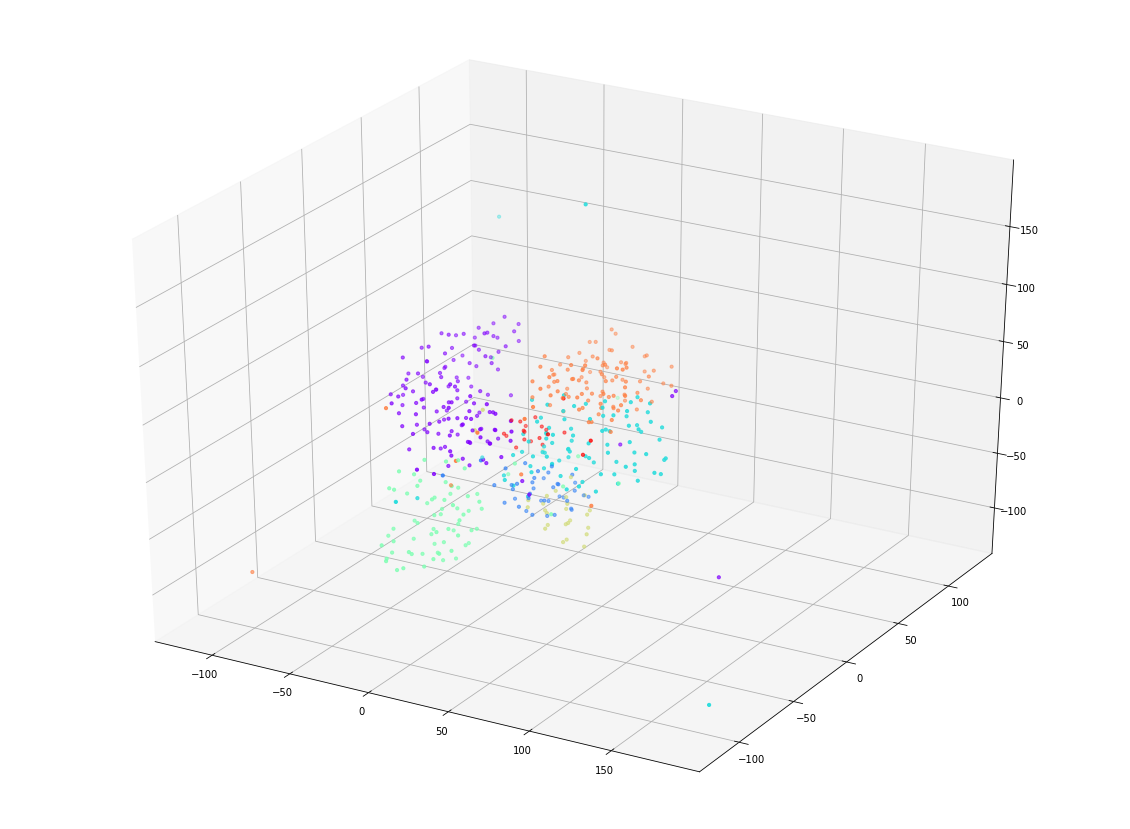

In [243]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')
ax.scatter3D(proj_v[:, 0], proj_v[:, 1],proj_v[:, 2], c=l_v, s=10, cmap='rainbow')

In [244]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=0)
proj_t = tsne.fit_transform(data_t)

tsne = TSNE(n_components=2, init='random', random_state=0)
proj_v = tsne.fit_transform(data_v)


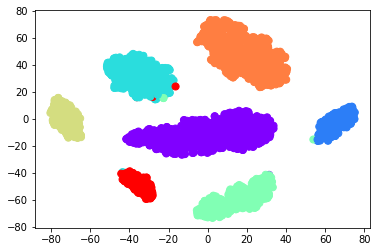

In [245]:
plt.scatter(proj_t[:, 0], proj_t[:, 1], c=l_t, s=50, cmap='rainbow');

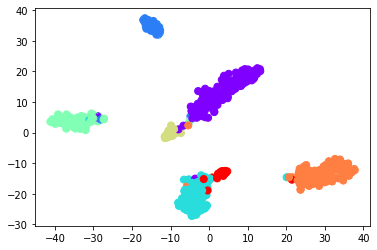

In [246]:
plt.scatter(proj_v[:, 0], proj_v[:, 1], c=l_v, s=50, cmap='rainbow');

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


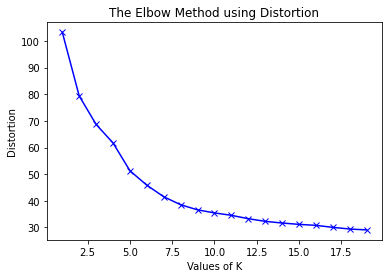

In [247]:
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans 


distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
Kk = range(1,20) 
  
for k in Kk:
  print(k)
  #Building and fitting the model 
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data_t)     
      
  distortions.append(sum(np.min(cdist(data_t, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / data_t.shape[0]) 
  inertias.append(kmeanModel.inertia_) 
  
  mapping1[k] = sum(np.min(cdist(data_t, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / data_t.shape[0] 
  mapping2[k] = kmeanModel.inertia_ 

# for key,val in mapping1.items(): 
#     print(str(key)+' : '+str(val)) 

plt.plot(Kk, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


In [248]:
kmeanModel_AE = KMeans(n_clusters=7)
kmeanModel_AE.fit(data_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [249]:
# cluster numbers for training data
x_kmeans_AE = kmeanModel_AE.predict(data_t)

# cluster numbers for val data
y_kmeans_AE = kmeanModel_AE.predict(data_v)

In [250]:
dataset_paths = output_df['image_path'].tolist()
t_path = dataset_paths[:4000]
v_path = dataset_paths[4000:]

db_cluster_path_list = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}
db_cluster_labels = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}
db_cluster_encoded = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}

q_cluster_path_list = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}
q_cluster_labels = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}
q_cluster_encoded = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[]}


for idx , cluster_number in enumerate(x_kmeans_AE):
  db_cluster_path_list[cluster_number].append(t_path[idx])
  db_cluster_labels[cluster_number].append(name[int(l_t[idx])])
  db_cluster_encoded[cluster_number].append(data_t[idx])


for idx , cluster_number in enumerate(y_kmeans_AE):
  q_cluster_path_list[cluster_number].append(v_path[idx])
  q_cluster_labels[cluster_number].append(name[int(l_v[idx])])
  q_cluster_encoded[cluster_number].append(data_v[idx])

In [ ]:
q_cluster_labels

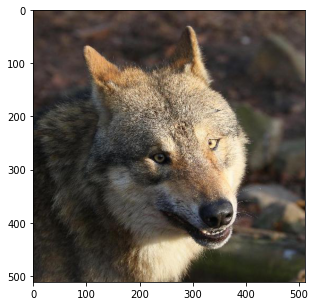

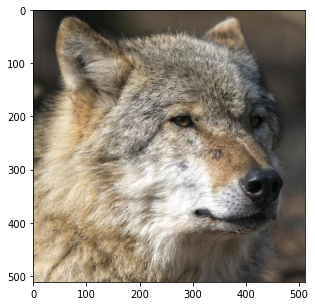

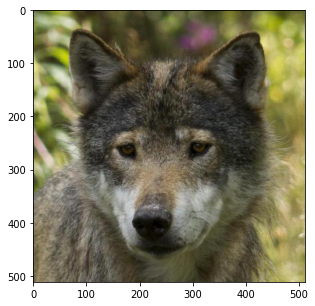

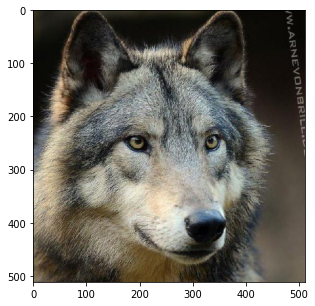

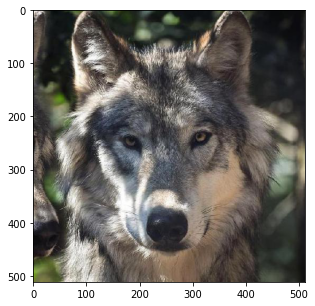

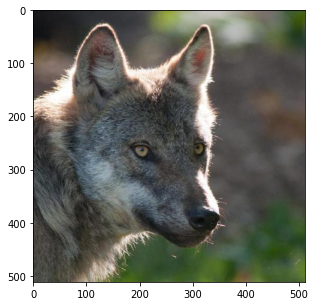

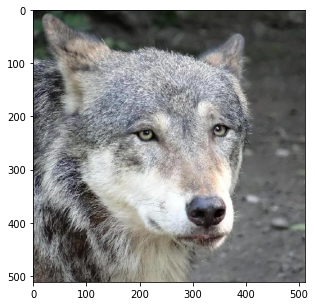

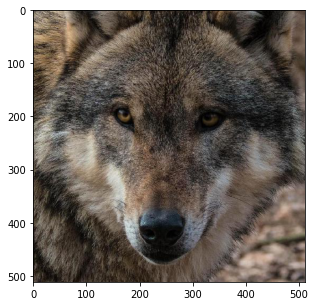

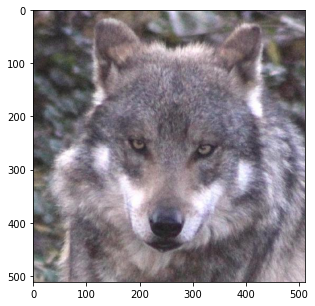

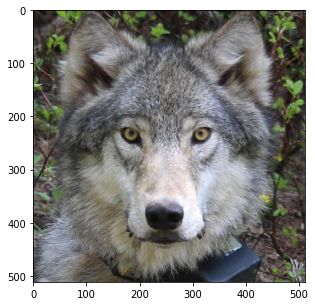

In [258]:
num = 5
i = 0
for path in db_cluster_path_list[num]:
  i+=1
  if i>10:
    break

  img = imread(path)
  
  plt.figure(figsize=(5,5))
  plt.imshow(img)


In [253]:
for i in range(7):
  print('images in cluster {}'.format(i), len(db_cluster_path_list[i]))

images in cluster 0 1106
images in cluster 1 894
images in cluster 2 674
images in cluster 3 531
images in cluster 4 273
images in cluster 5 302
images in cluster 6 220


In [259]:
cluster_num = 5
img_num = 1

results = []
q_encode = q_cluster_encoded[cluster_num][img_num]
q_path = q_cluster_path_list[cluster_num][img_num]

for db_encode,path in zip(db_cluster_encoded[cluster_num],db_cluster_path_list[cluster_num]):

  d = np.linalg.norm(q_encode - db_encode)
  results.append((d,path))

sorted_res = sorted(results)[:25]

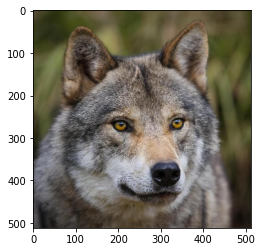

In [260]:
q_img = imread(q_path)
plt.imshow(q_img)

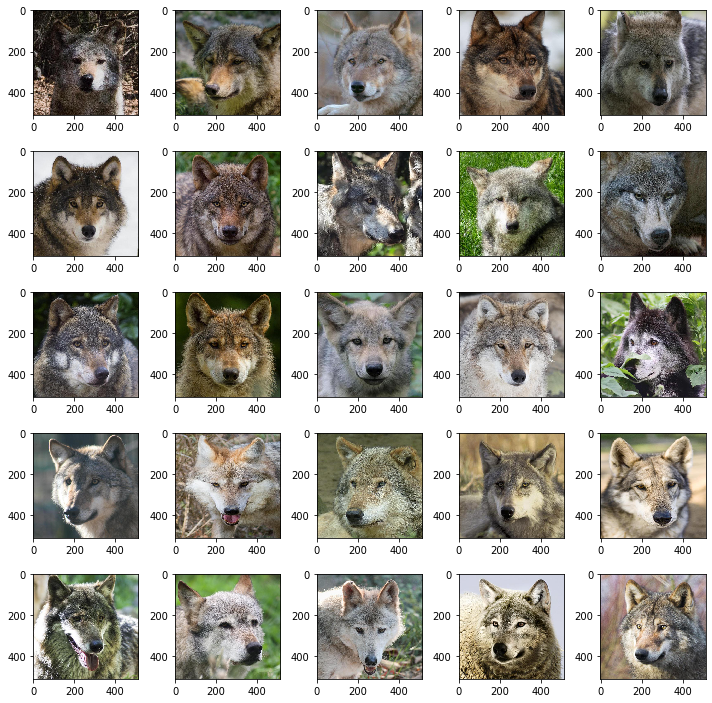

In [261]:
plt.figure(figsize=(10,10))
for idx , (_,path) in enumerate(sorted_res):
  image = imread(path)
  plt.subplot(5,5,idx+1)
  io.imshow(image)

plt.show()

In [336]:
from skimage.transform import resize
img = imread('/content/gray-wolf-member-dog-family.jpg')
img = resize(img,(512,512),anti_aliasing=True)

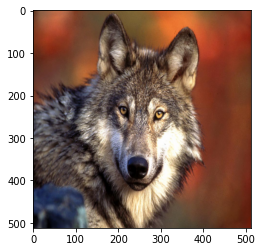

In [337]:
plt.imshow(img)

In [338]:
img = np.expand_dims(img,0)

In [339]:
 _,_,q_encodings = distiller.predict(img)
 a = kmeanModel_AE.predict(q_encodings)

In [340]:
q_encodings.shape

(1, 1024)

In [341]:
q_encode = q_encodings[0:1]
cluster_num = int(kmeanModel_AE.predict(q_encode))
results = []
for db_encode,path in zip(db_cluster_encoded[cluster_num],db_cluster_path_list[cluster_num]):

  d = np.linalg.norm(q_encode - db_encode)
  results.append((d,path))

sorted_res = sorted(results)[:25]

In [342]:
cluster_num

5

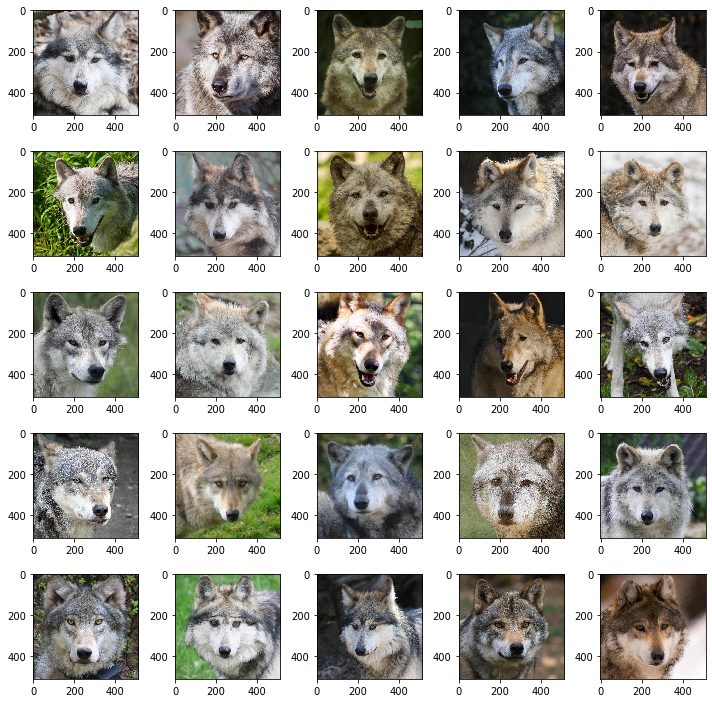

In [343]:
plt.figure(figsize=(10,10))
for idx , (_,path) in enumerate(sorted_res):
  image = imread(path)
  plt.subplot(5,5,idx+1)
  io.imshow(image)

plt.show()